In [1]:
import pandas as pd
import logomaker as lm
import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
import lacroix

import json 

sns.set_style('white')

Matplotlib is building the font cache; this may take a moment.


In [2]:
amypro = pd.read_pickle('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/seqplotting/full_amypro_predictions.pkl')
amypro['regions'] = amypro.apply(lambda row: [row['regions.region_1.region_indices'], row['regions.region_2.region_indices'], row['regions.region_3.region_indices'], row['regions.region_4.region_indices'], row['regions.region_5.region_indices']], axis=1)
amypro['len'] = amypro['sequence'].apply(lambda x: len(x))
amypro.head(2)

,entry_id,pdb_id,pubmed_ids,protein_name,prion_domain,class_name,uniprot_id,sequence,mutations,uniprot_end,...,data_split_fold4,data_split_fold5,predictions_0,predictions_1,predictions_2,predictions_3,predictions_4,prediction_avg,regions,len
0,AP00055,N/A,"[19345193, 22561191]",Nup100,True,not known,Q02629,MFGNNRPMFGGSNLSFGSNTSSFGGQQSQQPNSLFGNSNNNNNSTS...,[],,...,test,test,"[0.7316529, 0.7328647, 0.732098, 0.7378513, 0....","[0.8501159, 0.8493195, 0.85526776, 0.8564786, ...","[0.5530683, 0.55522496, 0.56574315, 0.5665131,...","[0.76970214, 0.76953703, 0.77655387, 0.7786879...","[0.7671536, 0.76988834, 0.7695552, 0.7754302, ...","[0.7343385696411133, 0.7353669166564941, 0.739...","[300-400, nan, nan, nan, nan]",959
1,AP00054,N/A,"[19345193, 21453424]",New1,True,functional prion,Q08972,MPPKKFKDLNSFLDDQPKDPNLVASPFGGYFKNPAADAGSNNASKK...,[],,...,test,test,"[0.732912, 0.7335862, 0.73368204, 0.73375416, ...","[0.8562108, 0.85515267, 0.85701126, 0.855329, ...","[0.5763016, 0.57238704, 0.57504857, 0.5707282,...","[0.7824801, 0.7830645, 0.7824525, 0.78039426, ...","[0.77139574, 0.7709084, 0.7712728, 0.77131885,...","[0.7438600540161133, 0.7430197715759277, 0.743...","[1-153, nan, nan, nan, nan]",1196


In [3]:
amypro.sort_values(by='len')['protein_name'].head(50)

121                                              Cn-AMP2
110                       Regulatory protein Cro peptide
88                     Uperine-3.5 antimicrobial peptide
87                     Protegrin-1 antimicrobial peptide
94     Defensin-like protein 1 C-terminal peptide, C6...
115                            Phenol-soluble modulin A1
44                                       Insulin Chain A
54                                             Obestatin
61                          Preprodermaseptin S9, DRS S9
116    Accessory gene regulator D amphipathic leader ...
23                                              Glucagon
51                                       Insulin Chain B
84                                            Calcitonin
123                              Human α-defensin 6, HD6
76                               Glucagon-like peptide 2
107                                         ABri peptide
122                                         ADan peptide
71                             

In [4]:
def hex_to_rgb(hex_code):
    """Convert a hex color code to an RGB tuple in the range of 0 to 1."""
    # Remove the hash symbol if it exists
    hex_code = hex_code.lstrip('#')
    
    # Convert the hex code to RGB values
    r = int(hex_code[0:2], 16) / 255.0
    g = int(hex_code[2:4], 16) / 255.0
    b = int(hex_code[4:6], 16) / 255.0
    
    return np.array([r, g, b])

In [5]:
lcb = hex_to_rgb(lacroix.colorList('Berry')[4])
lcg = hex_to_rgb(lacroix.colorList('Lime')[2])

d = {'R': lcb,
 'r': lcb,
 'K': lcb,
 'k': lcb,
 'D': lcb,
 'd': lcb,
 'E': lcb,
 'e': lcb,
 'N': lcb,
 'n': lcb,
 'Q': lcb,
 'q': lcb,
 'S': lcg,
 's': lcg,
 'G': lcg,
 'g': lcg,
 'H': lcg,
 'h': lcg,
 'T': lcg,
 't': lcg,
 'A': lcg,
 'a': lcg,
 'P': lcg,
 'p': lcg,
 'Y': np.array([0., 0., 0.]),
 'y': np.array([0., 0., 0.]),
 'V': np.array([0., 0., 0.]),
 'v': np.array([0., 0., 0.]),
 'M': np.array([0., 0., 0.]),
 'm': np.array([0., 0., 0.]),
 'C': np.array([0., 0., 0.]),
 'c': np.array([0., 0., 0.]),
 'L': np.array([0., 0., 0.]),
 'l': np.array([0., 0., 0.]),
 'F': np.array([0., 0., 0.]),
 'f': np.array([0., 0., 0.]),
 'I': np.array([0., 0., 0.]),
 'i': np.array([0., 0., 0.]),
 'W': np.array([0., 0., 0.]),
 'w': np.array([0., 0., 0.])}

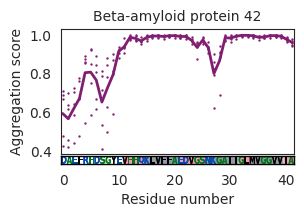

In [13]:
ctr = 0
for row in amypro[amypro['protein_name'] == 'Beta-amyloid protein 42'].iterrows():
    if len(row[1]['sequence']) < 100:
        name = row[1]['protein_name']
        index = row[0]
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3, 1.75), gridspec_kw={'height_ratios': [4, 0.25], 'hspace': 0.025})  
        ax1.plot(amypro[amypro['protein_name'] == name]['prediction_avg'][index], color=lacroix.colorList('Berry')[2], lw=2)
        for j in range(5):
            ax1.scatter(range(len(row[1][f'predictions_{j}'])), amypro[amypro['protein_name'] == name][f'predictions_{j}'][index], color=lacroix.colorList('Berry')[2], s=0.5)
      
        ax1.set_ylabel('Aggregation score', fontsize=10)
        input_string = str(amypro[amypro['protein_name'] == name]['sequence'].reset_index(drop=True)[0])
        ax1.set_title(name, fontsize=10)
        wt_seq = input_string
        count_df = lm.alignment_to_matrix([wt_seq], to_type='counts')
        ax1.set_xlim([0-0.25,len(input_string)-1+0.25])
        #ax1.set_ylim([0,1])
        
        logo_wt = lm.Logo(count_df, color_scheme='hydrophobicity', ax=ax2)
        logo_wt.rgb_dict = d 
        logo_wt._compute_glyphs()
        logo_wt.draw()

        for i in row[1]['regions']:
            if type(i) == str:
                pmin = int(i.split('-')[0])
                pmax = int(i.split('-')[1])
                logo_wt.highlight_position_range(pmin=pmin, pmax=pmax, color=lacroix.colorList('CranRaspberry')[2], alpha=0.4)

        if name == 'Beta-amyloid protein 42':
            for i in [[15,20], [26,31], [34,39]]:
                pmin = i[0]
                pmax = i[1]
                logo_wt.highlight_position_range(pmin=pmin, pmax=pmax, color=lacroix.colorList('CranRaspberry')[3], alpha=0.4)
        
        logo_wt.ax.set_title('')
        logo_wt.ax.xaxis.set_ticks_position('none')
        logo_wt.style_spines(spines=['top', 'bottom', 'left', 'right'], visible=True)
        logo_wt.ax.get_yaxis().set_visible(False)
        ax1.get_xaxis().set_visible(False)
        plt.xlabel('Residue number', fontsize=10)
        
        plt.show()
        #fig.savefig('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/2506_figures_final/fig4_abeta.png', dpi=600, bbox_inches='tight')
        #fig.savefig('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/2506_figures_final/fig4_abeta.pdf', dpi=600, bbox_inches='tight')
        #fig.savefig(f'/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/seqplotting/pngs/{name}.png', dpi=500, bbox_inches='tight')

N-terminal part of atrial natriuretic peptide, ANP fragment 0
N-terminal part of atrial natriuretic peptide, ANP fragment 1
N-terminal part of atrial natriuretic peptide, ANP fragment 2
N-terminal part of atrial natriuretic peptide, ANP fragment 3
Viral protease VP4 fragment 0
Viral protease VP4 fragment 1
Viral protease VP4 fragment 2
Viral protease VP4 fragment 3
Viral protease VP4 fragment 4
Viral protease VP4 fragment 5
Biofilm-associated protein, Bap fragment 0
Biofilm-associated protein, Bap fragment 1
Biofilm-associated protein, Bap fragment 2
Biofilm-associated protein, Bap fragment 3
Biofilm-associated protein, Bap fragment 4
Biofilm-associated protein, Bap fragment 5
Biofilm-associated protein, Bap fragment 6
Biofilm-associated protein, Bap fragment 7
Biofilm-associated protein, Bap fragment 8
Biofilm-associated protein, Bap fragment 9
Biofilm-associated protein, Bap fragment 10
Biofilm-associated protein, Bap fragment 11
Biofilm-associated protein, Bap fragment 12
Biofilm-as

ValueError: Image size of 3552x182426 pixels is too large. It must be less than 2^16 in each direction.

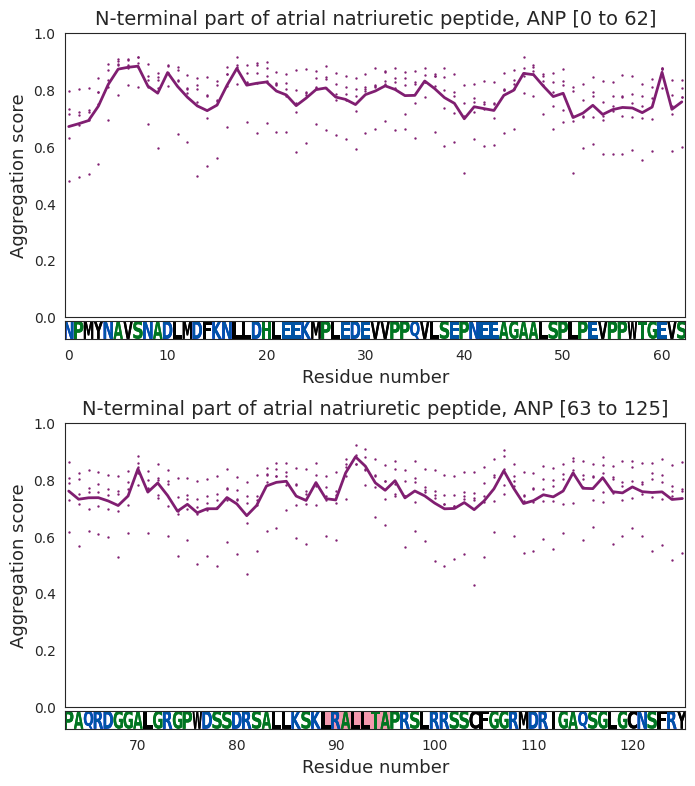

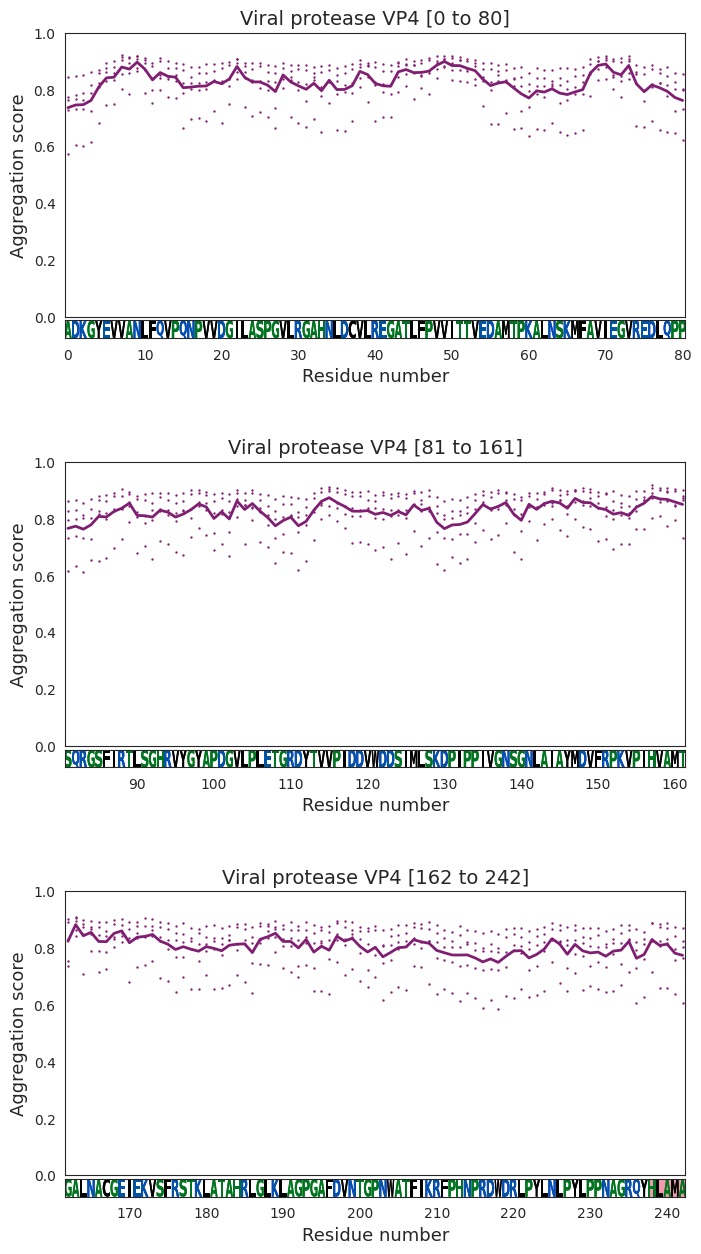

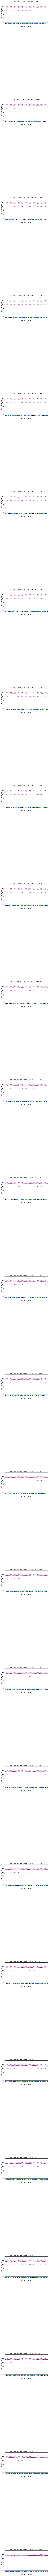

In [17]:
ctr = 0
for row in amypro.iterrows():
    if len(row[1]['sequence']) > 100 and row[0] > 102:
        idx_ctr = 0
        
        name = row[1]['protein_name']
        index = row[0]
        n_segments = (len(row[1]['sequence']) + 100 - 1) // 100 
        nsd2 = int(n_segments/2)
        segment_length = len(row[1]['sequence']) // n_segments

        gs = gridspec.GridSpec(n_segments*2, 1, height_ratios=[4, 0.25] * n_segments, hspace=0.025)
        fig = plt.figure(figsize=(8, 4 * n_segments))
        axes = []
        disp = 0
        
        for i in range(n_segments*2):
            print(name, f'fragment {i}')
            ax = fig.add_subplot(gs[i])
            axes.append(ax)
        
            if i > 1 and i % 2 == 0:
                disp += 0.1
        
            if i % 2 == 0 or i == 0:
                # main plots
                start_index = idx_ctr * segment_length
                end_index = start_index + segment_length
                if idx_ctr == n_segments - 1: 
                    end_index = len(row[1]['sequence']) 
                ax.plot(range(start_index,end_index), amypro[amypro['protein_name'] == name]['prediction_avg'][index][start_index:end_index], color=lacroix.colorList('Berry')[2], lw=2)
                for k in range(5):
                    ax.scatter(range(start_index,end_index), amypro[amypro['protein_name'] == name][f'predictions_{k}'][index][start_index:end_index], color=lacroix.colorList('Berry')[2], s=0.5)
                ax.set_title(f'{name} [{start_index} to {end_index - 1}]', fontsize=14)
                ax.set_ylabel('Aggregation score', fontsize=13)
                ax.get_xaxis().set_visible(False)
                ax.set_ylim([0,1])
                idx_ctr += 1
                
                input_string = str(amypro[amypro['protein_name'] == name]['sequence'].reset_index(drop=True)[0])
                count_df = lm.alignment_to_matrix([input_string], to_type='counts')
                
            
            if i % 2 == 1:
                # seqs
                logo_wt = lm.Logo(count_df, color_scheme='hydrophobicity', ax=ax)
                logo_wt.rgb_dict = d 
                logo_wt._compute_glyphs()
                logo_wt.draw()
                ax.set_xlabel('Residue number', fontsize=13)

                for j in row[1]['regions']:
                    if type(j) == str:
                        pmin = int(j.split('-')[0])
                        pmax = int(j.split('-')[1])
                        logo_wt.highlight_position_range(pmin=pmin, pmax=pmax, color=lacroix.colorList('CranRaspberry')[2], alpha=0.4)

                
                ax.get_yaxis().set_visible(False)
                
            ax.set_xlim([start_index-0.35,end_index-1+0.35])
            
            pos = ax.get_position()  
            ax.set_position([pos.x0, pos.y0 - disp, pos.width, pos.height]) 
            
        fig.savefig(f'/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/seqplotting/pngs/{name}.png', dpi=500, bbox_inches='tight')

In [10]:
apro = pd.read_csv('/novo/projects/departments/cdd/public/users/ehec/au24/datasets/amypro22.csv')
apro

,Unnamed: 0,sequence,res_value_bool,name,len,dataset,data_split,value_bool
0,13990,LPICPGGAARCQVTLRDLFDRAVVLSHYIHNLSSEMFSEFDKRYTH...,0000001111111111111111111111111111000000001111...,Prolactin__AP00001,199,amypro22,test,1
1,13991,KNTMEHVSSSEESIISQETYKQEKNMAINPSKENLCSTFCKEVVRN...,0000000000000000000000000000000000000000000000...,Alpha-s2-casein__AP00004,207,amypro22,test,1
2,13992,RSFFSFLGEAFDGARDMWRAYSDMREANYIGSDKYFHARGNYDAAK...,1111111111111111111111111110000000000000000000...,Serum_Amyloid_A-1__AP00005,104,amypro22,test,1
3,13994,TQQPQQDEMPSPTFLTQVKESLSSYWESAKTAAQNLYEKTYLPAVD...,0000000000000000000000000000000000000000000000...,Apoliprotein__AP00020,79,amypro22,test,1
4,13995,APLIPQRLMSASNSNELLLNLNNGQLLPLQLQGPLNSWIPPFSGIL...,0000000000000000000000000000000000000000000000...,Odontogenic_ameloblast-associated_protein__AP...,264,amypro22,test,1
5,13996,LIVTQTMKGLDIQKVAGTWYSLAMAASDISLLDAQSAPLRVYVEEL...,0000000000111111111100000000000000000000000000...,Beta-lactoglobulin__AP00025,162,amypro22,test,1
6,13997,GLSDGEWQQVLNVWGKVEADIAGHGQEVLIRLFTGHPETLEKFDKF...,1111111111111111111111111111100000000000000000...,Apomyoglobin__AP00030,153,amypro22,test,1
7,13999,GETDPNTQLLNDLGNNMAWGAALGAPGGLGSAALGAAGGALQTVGQ...,0000000000000000000000000000000000000000000000...,Microcin_E492__AP00040,84,amypro22,test,1
8,14002,MNSLNTQLGANSSFFQVDPGQNTQSSPNQGNQGISEKQLDQLLTQL...,0000000000000000000000000000001111111111111111...,Elicitor_of_hypersensitive_response_HpaG__AP0...,133,amypro22,test,1
9,14003,MALLDFFLSRKKNTANIAKERLQIIVAERRRSDAEPHYLPQLRKDI...,0000000000000000001111111111000000000000000000...,Cell_division_topological_specificity_factor_...,88,amypro22,test,1
